<a href="https://colab.research.google.com/github/ericzinhos/WikipediaAnalyzer/blob/main/WikipediaAnalyzer1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÓDULO I – Análise de mudança de vieses ao longo do tempo


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Digite o título da página da Wikipédia: Catóblepa
Fazendo requisição... (Versões coletadas até agora: 0)
Todas as edições foram coletadas.
Todas as 40 versões foram salvas na pasta 'versoes_Catóblepa'.

Escolha uma opção:
1. Gerar gráfico de total de palavras por versão
2. Gerar gráfico de frequência de palavras específicas
3. Gerar gráfico de TF-IDF
4. Gerar gráfico das palavras mais frequentes
5. Escolher novo verbete (mantém dados atuais)
6. Apagar dados e sair
Opção: 5
Digite o título da página da Wikipédia: Catóblepa
Fazendo requisição... (Versões coletadas até agora: 0)
Todas as edições foram coletadas.
Todas as 40 versões foram salvas na pasta 'versoes_Catóblepa'.

Escolha uma opção:
1. Gerar gráfico de total de palavras por versão
2. Gerar gráfico de frequência de palavras específicas
3. Gerar gráfico de TF-IDF
4. Gerar gráfico das palavras mais frequentes
5. Escolher novo verbete (mantém dados atuais)
6. Apagar dados e sair
Opção: 3
Digite uma ou mais palavras (separadas por v

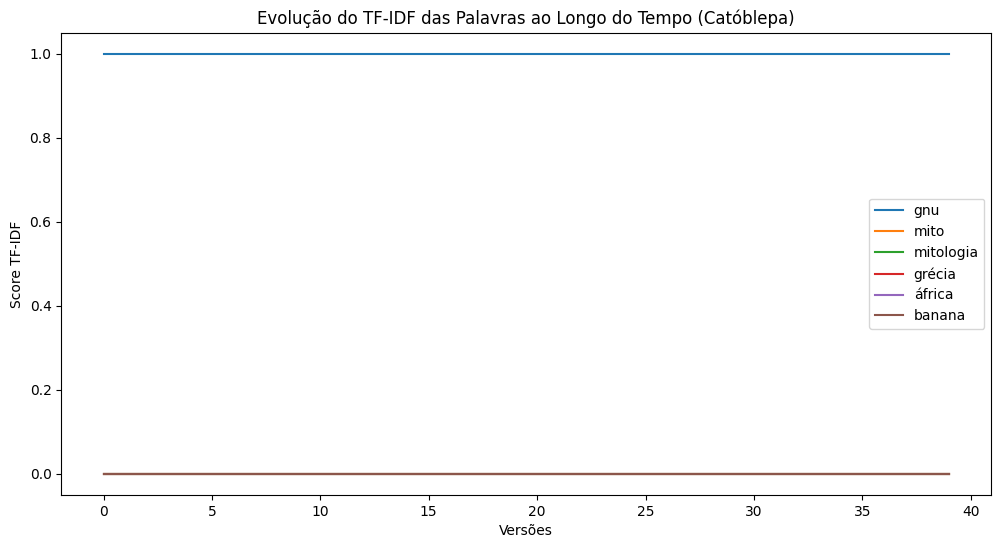


Escolha uma opção:
1. Gerar gráfico de total de palavras por versão
2. Gerar gráfico de frequência de palavras específicas
3. Gerar gráfico de TF-IDF
4. Gerar gráfico das palavras mais frequentes
5. Escolher novo verbete (mantém dados atuais)
6. Apagar dados e sair
Opção: 5
Digite o título da página da Wikipédia: Imbituba
Fazendo requisição... (Versões coletadas até agora: 0)
Fazendo requisição... (Versões coletadas até agora: 50)
Fazendo requisição... (Versões coletadas até agora: 100)
Fazendo requisição... (Versões coletadas até agora: 150)
Fazendo requisição... (Versões coletadas até agora: 200)
Fazendo requisição... (Versões coletadas até agora: 250)
Fazendo requisição... (Versões coletadas até agora: 300)
Todas as edições foram coletadas.
Todas as 319 versões foram salvas na pasta 'versoes_Imbituba'.

Escolha uma opção:
1. Gerar gráfico de total de palavras por versão
2. Gerar gráfico de frequência de palavras específicas
3. Gerar gráfico de TF-IDF
4. Gerar gráfico das palavras m

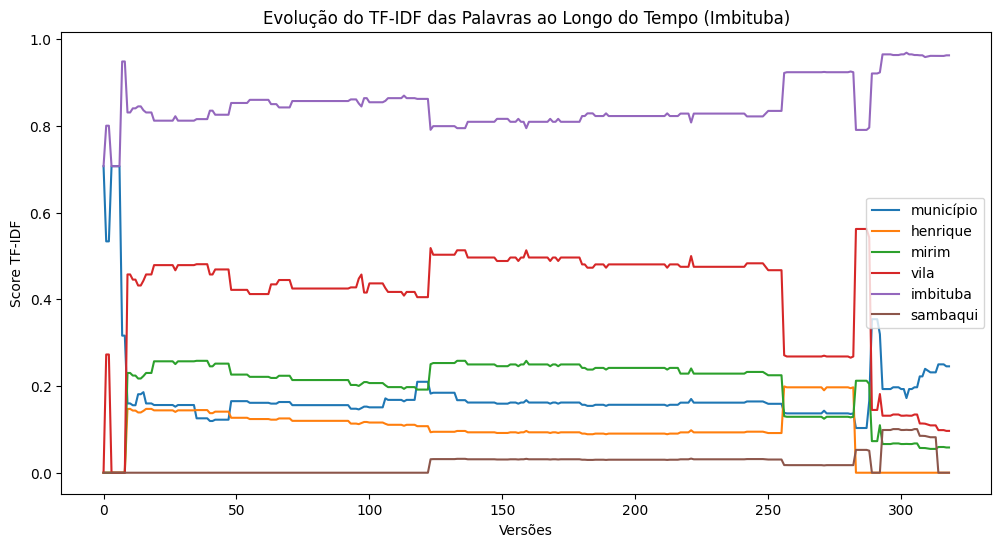


Escolha uma opção:
1. Gerar gráfico de total de palavras por versão
2. Gerar gráfico de frequência de palavras específicas
3. Gerar gráfico de TF-IDF
4. Gerar gráfico das palavras mais frequentes
5. Escolher novo verbete (mantém dados atuais)
6. Apagar dados e sair
Opção: 4


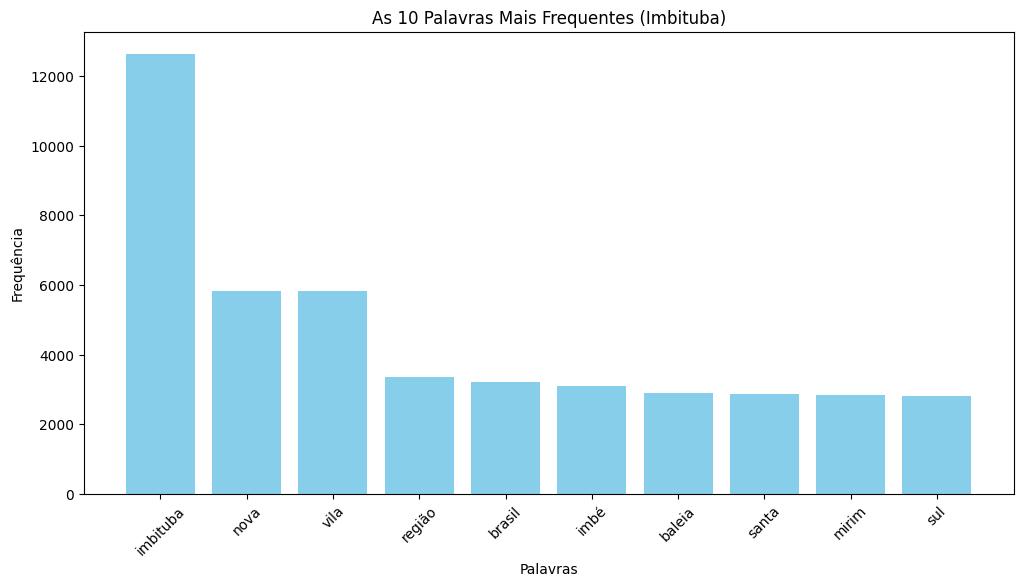


Escolha uma opção:
1. Gerar gráfico de total de palavras por versão
2. Gerar gráfico de frequência de palavras específicas
3. Gerar gráfico de TF-IDF
4. Gerar gráfico das palavras mais frequentes
5. Escolher novo verbete (mantém dados atuais)
6. Apagar dados e sair


KeyboardInterrupt: Interrupted by user

In [ ]:
import os
import shutil
import requests
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from datetime import datetime
import time
import string

# Baixa as stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Funções
def formatar_data(timestamp):
    return datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d_%H-%M-%S")

def coletar_versoes(titulo_pagina):
    API_URL = "https://pt.wikipedia.org/w/api.php"
    pasta_saida = f"versoes_{titulo_pagina.replace(' ', '_')}"
    os.makedirs(pasta_saida, exist_ok=True)

    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": titulo_pagina,
        "rvprop": "timestamp|content",
        "rvlimit": "500",
        "rvdir": "newer",
        "continue": ""
    }

    contador_versoes = 0

    while True:
        try:
            print(f"Fazendo requisição... (Versões coletadas até agora: {contador_versoes})")
            response = requests.get(API_URL, params=params, timeout=30)
            response.raise_for_status()
            data = response.json()

            pages = data["query"]["pages"]
            for page in pages:
                revisions = pages[page]["revisions"]
                for revision in revisions:
                    contador_versoes += 1
                    timestamp = revision["timestamp"]

                    if "*" in revision:
                        content = revision["*"]
                    else:
                        print(f"Conteúdo não encontrado na versão {contador_versoes}. Pulando...")
                        continue

                    numero_versao = f"{contador_versoes:04d}"
                    data_formatada = formatar_data(timestamp)
                    nome_arquivo = f"{pasta_saida}/versao_{numero_versao}_{data_formatada}.txt"

                    with open(nome_arquivo, "w", encoding="utf-8") as arquivo:
                        arquivo.write(content)

            if "continue" in data:
                params.update(data["continue"])
            else:
                print("Todas as edições foram coletadas.")
                break

            time.sleep(1)

        except requests.exceptions.RequestException as e:
            print(f"Erro na requisição: {e}")
            break

    print(f"Todas as {contador_versoes} versões foram salvas na pasta '{pasta_saida}'.")
    return pasta_saida

def grafico_total_palavras(pasta_saida, titulo_pagina):
    total_palavras_por_versao = []

    for nome_arquivo in sorted(os.listdir(pasta_saida)):
        if nome_arquivo.endswith(".txt"):
            caminho_arquivo = os.path.join(pasta_saida, nome_arquivo)
            with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
                texto = arquivo.read()
                total_palavras = len(texto.split())
                total_palavras_por_versao.append(total_palavras)

    plt.figure(figsize=(12, 6))
    plt.plot(total_palavras_por_versao, label='Total de Palavras')
    plt.xlabel('Versões')
    plt.ylabel('Número de Palavras')
    plt.title(f'Número Total de Palavras por Versão ({titulo_pagina})')
    plt.legend()
    plt.show()

def mostrar_grafico_com_menu():
    plt.show()
    plt.pause(0.001)  # Pequena pausa para atualizar a figura

def grafico_frequencia_palavras(pasta_saida, titulo_pagina):
    contagens_ao_longo_do_tempo = []

    for nome_arquivo in sorted(os.listdir(pasta_saida)):
        if nome_arquivo.endswith(".txt"):
            caminho_arquivo = os.path.join(pasta_saida, nome_arquivo)
            with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
                texto = arquivo.read()
                contagem = processar_texto(texto)
                contagens_ao_longo_do_tempo.append(contagem)

    palavras_usuario = input("Digite uma ou mais palavras (separadas por vírgula): ").strip().lower()
    palavras = [palavra.strip() for palavra in palavras_usuario.split(',')]

    frequencias = {palavra: [] for palavra in palavras}
    for contagem in contagens_ao_longo_do_tempo:
        for palavra in palavras:
            frequencias[palavra].append(contagem.get(palavra, 0))

    plt.figure(figsize=(12, 6))
    for palavra in palavras:
        plt.plot(frequencias[palavra], label=palavra)

    plt.xlabel('Versões')
    plt.ylabel('Frequência')
    plt.title(f'Frequência das Palavras ao Longo do Tempo ({titulo_pagina})')
    plt.legend()
    plt.show()

def grafico_tfidf(pasta_saida, titulo_pagina):
    textos = []

    for nome_arquivo in sorted(os.listdir(pasta_saida)):
        if nome_arquivo.endswith(".txt"):
            caminho_arquivo = os.path.join(pasta_saida, nome_arquivo)
            with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
                texto = arquivo.read()
                texto = texto.translate(str.maketrans('', '', string.punctuation)).lower()
                textos.append(texto)

    palavras_usuario = input("Digite uma ou mais palavras (separadas por vírgula): ").strip().lower()
    palavras = [palavra.strip() for palavra in palavras_usuario.split(',')]

    vectorizer = TfidfVectorizer(
        vocabulary=palavras,
        lowercase=True,
        stop_words=list(stop_words))

    tfidf = vectorizer.fit_transform(textos)
    scores_tfidf = tfidf.toarray()

    plt.figure(figsize=(12, 6))
    for i, palavra in enumerate(palavras):
        plt.plot(scores_tfidf[:, i], label=palavra)

    plt.xlabel('Versões')
    plt.ylabel('Score TF-IDF')
    plt.title(f'Evolução do TF-IDF das Palavras ao Longo do Tempo ({titulo_pagina})')
    plt.legend()
    plt.show()

def grafico_palavras_mais_frequentes(pasta_saida, titulo_pagina, n=10):
    todas_palavras = Counter()

    for nome_arquivo in sorted(os.listdir(pasta_saida)):
        if nome_arquivo.endswith(".txt"):
            caminho_arquivo = os.path.join(pasta_saida, nome_arquivo)
            with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
                texto = arquivo.read()
                contagem = processar_texto(texto)
                todas_palavras += contagem

    palavras_mais_comuns = todas_palavras.most_common(n)
    palavras, frequencias = zip(*palavras_mais_comuns)

    plt.figure(figsize=(12, 6))
    plt.bar(palavras, frequencias, color='skyblue')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.title(f'As {n} Palavras Mais Frequentes ({titulo_pagina})')
    plt.xticks(rotation=45)
    plt.show()

# Processamento de texto e contagem de palavras
def processar_texto(texto):
    texto = texto.translate(str.maketrans('', '', string.punctuation)).lower()
    palavras = texto.split()
    palavras = [palavra for palavra in palavras if palavra not in stop_words and len(palavra) > 2]
    return Counter(palavras)

# Apaga os dados
def apagar_dados(pasta_saida):
    if os.path.exists(pasta_saida):
        shutil.rmtree(pasta_saida)
        print(f"Pasta '{pasta_saida}' removida.")
    else:
        print(f"Pasta '{pasta_saida}' não encontrada.")

# Menu interativo
def menu_principal():
    while True:
        # Solicita o título da página
        titulo_pagina = input("Digite o título da página da Wikipédia: ").strip()

        # Coleta as versões do verbete
        pasta_saida = coletar_versoes(titulo_pagina)

        # Menu de opções após a coleta
        while True:
            print("\nEscolha uma opção:")
            print("1. Gerar gráfico de total de palavras por versão")
            print("2. Gerar gráfico de frequência de palavras específicas")
            print("3. Gerar gráfico de TF-IDF")
            print("4. Gerar gráfico das palavras mais frequentes")
            print("5. Escolher novo verbete (mantém dados atuais)")
            print("6. Apagar dados e sair")

            opcao = input("Opção: ").strip()

            if opcao == "1":
                grafico_total_palavras(pasta_saida, titulo_pagina)
            elif opcao == "2":
                grafico_frequencia_palavras(pasta_saida, titulo_pagina)
            elif opcao == "3":
                grafico_tfidf(pasta_saida, titulo_pagina)
            elif opcao == "4":
                grafico_palavras_mais_frequentes(pasta_saida, titulo_pagina)
            elif opcao == "5":
                break  # Volta ao início para escolher um novo verbete
            elif opcao == "6":
                confirmacao = input("Tem certeza que deseja apagar todos os dados e sair? (s/n): ").strip().lower()
                if confirmacao == 's':
                    # Apaga todas as pastas que começam com 'versoes_'
                    for pasta in os.listdir():
                        if pasta.startswith('versoes_'):
                            shutil.rmtree(pasta)
                            print(f"Pasta '{pasta}' removida.")
                print("Saindo...")
                return  # Encerra o programa
            else:
                print("Opção inválida. Tente novamente.")

# Executa o menu principal
menu_principal()

# MÓDULO II – Análise de redes de usuários

In [ ]:
!pip install mwclient plotly pandas networkx tqdm

import mwclient
import networkx as nx
import plotly.graph_objects as go
import math
from tqdm import tqdm
from collections import defaultdict

class WikipediaVisualizer:
    def __init__(self):
        self.site = mwclient.Site('pt.wikipedia.org', clients_useragent='TCC_Visualizador/4.0')
        self.edits = []
        self.G = nx.DiGraph()

    def fetch_all_edits(self, article_title):
        self.article_title = article_title
        page = self.site.pages[article_title]
        self.edits = list(tqdm(
            page.revisions(prop='user|comment|tags|ids|roles|timestamp', dir='newer', limit=None),
            desc='Coletando edições',
            unit=' edições'
        ))

    def _get_user_type(self, username):
        try:
            user_page = self.site.pages[f'Usuário:{username}']
            text = user_page.text()
            if any(tag in text for tag in ['Administrador/Topo', 'Wikipedia:Userbox/Administrador']):
                return 'Admin'
            if any(tag in text for tag in ['{{Wikipedia-Bots}}', '[[Categoria:!Robôs]]']):
                return 'Bot'
            if 'autorrevisor' in text.lower():
                return 'Autorrevisor'
            return 'Editor'
        except Exception as e:
            return 'Não classificado'

    def _is_revert(self, current, previous):
        has_revert_tag = 'tags' in current and 'mw-revert' in current['tags']
        has_parent_match = ('parentid' in current and 'revid' in previous and
                          current['parentid'] == previous['revid'])
        comment = current.get('comment', '').lower()
        revert_keywords = ['Etiqueta: Desfazer', 'Etiquetas: Desfazer', 'Etiquetas: Reversão', 'Etiqueta: Reversão', 'Reversão manual', 'Etiquetas: Reversão e Avisos', 'Desfeita a edição', 'Desfeita(s) uma ou mais edições']
        has_revert_comment = any(kw in comment for kw in revert_keywords)
        has_edit_id = any(word.isdigit() and len(word) >= 1 for word in comment.split())
        criteria = [has_revert_tag, has_parent_match, has_revert_comment, has_edit_id]
        return (sum(criteria) >= 1) and (has_revert_comment or has_edit_id)

    def build_network(self):
        user_data = defaultdict(lambda: {'edits': 0, 'type': None})
        self.reverts = []
        self.collaborations = []

        for rev in self.edits:
            if 'user' in rev and rev['user'] != 'Anonymous':
                user = rev['user']
                user_data[user]['edits'] += 1
                if not user_data[user]['type']:
                    user_data[user]['type'] = self._get_user_type(user)

        for i in tqdm(range(1, len(self.edits)), desc='Analisando relações'):
            current = self.edits[i]
            previous = self.edits[i-1]

            if not all('user' in r for r in [current, previous]):
                continue

            u1, u2 = current['user'], previous['user']
            if u1 == u2 or 'Anonymous' in [u1, u2]:
                continue

            self.collaborations.append((u1, u2))
            if self._is_revert(current, previous):
                self.reverts.append((u1, u2))

        for user, data in user_data.items():
            self.G.add_node(user, **data)

        self.G.add_edges_from(
            [(u, v, {'type': 'colab', 'color': '#1f77b4'}) for u, v in self.collaborations]
        )
        self.G.add_edges_from(
            [(u, v, {'type': 'revert', 'color': '#d62728'}) for u, v in self.reverts]
        )

    def visualize(self):
        pos = nx.spring_layout(self.G, k=0.7, seed=42, iterations=100)

        node_colors = {
            'Admin': '#9467bd',
            'Bot': '#ff7f0e',
            'Autorrevisor': '#1f77b4',
            'Editor': '#2ca02c',
            'Não classificado': '#7f7f7f'
        }

        node_traces = []
        for group, color in node_colors.items():
            nodes = [n for n, d in self.G.nodes(data=True) if d['type'] == group]
            sizes = [15 + math.log(d['edits']+1)*10 for n, d in self.G.nodes(data=True) if d['type'] == group]

            node_traces.append(go.Scatter(
                x=[pos[n][0] for n in nodes],
                y=[pos[n][1] for n in nodes],
                mode='markers+text',
                text=[n if self.G.nodes[n]['edits'] > 5 else '' for n in nodes],
                marker=dict(size=sizes, color=color),
                name=group,
                hoverinfo='text',
                hovertext=[f"Usuário: {n}<br>Edições: {d['edits']}" for n, d in self.G.nodes(data=True) if d['type'] == group]
            ))

        edge_traces = []
        for edge_type, color, name in [('colab', '#1f77b4', 'Colaborações'), ('revert', '#d62728', 'Reversões')]:
            edges = [(u, v) for u, v, d in self.G.edges(data=True) if d['type'] == edge_type]
            x_edges = []
            y_edges = []
            for u, v in edges:
                x_edges += [pos[u][0], pos[v][0], None]
                y_edges += [pos[u][1], pos[v][1], None]

            edge_traces.append(go.Scatter(
                x=x_edges,
                y=y_edges,
                line=dict(width=1, color=color),
                mode='lines',
                name=name
            ))

        stats_text = (
            f"Edições totais: {len(self.edits)}<br>"
            f"Editores únicos: {self.G.number_of_nodes()}<br>"
            f"Reversões detectadas: {len(self.reverts)}"
        )

        layout = go.Layout(
            title=f'<b>{self.article_title}</b><br><sub>Análise de Rede</sub>',
            showlegend=True,
            legend=dict(x=1.05, y=1, title='Legenda:'),
            margin=dict(b=150),
            annotations=[dict(
                text=stats_text,
                showarrow=False,
                x=0.05,
                y=-0.3,
                xref='paper',
                yref='paper',
                align='left',
                bgcolor='white',
                bordercolor='black'
            )],
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False)
        )

        fig = go.Figure(data=edge_traces + node_traces, layout=layout)
        fig.show()

# Fluxo principal de execução
if __name__ == "__main__":
    analyzer = WikipediaVisualizer()
    article_title = input("Digite o título do artigo da Wikipedia a ser analisado: ").strip()

    try:
        print(f"\nIniciando análise do artigo: {article_title}")
        analyzer.fetch_all_edits(article_title)
        analyzer.build_network()
        analyzer.visualize()
    except Exception as e:
        print(f"\nErro durante a análise: {str(e)}")
        print("Verifique se o título está correto e tente novamente.")

Digite o título do artigo da Wikipedia a ser analisado: Imbituba

Iniciando análise do artigo: Imbituba


Coletando edições: 319 edições [00:01, 273.83 edições/s]
Analisando relações: 100%|██████████| 318/318 [00:00<00:00, 200328.73it/s]


# MÓDULO III – Integração com Voyant Tools

## Coleta do texto das versões em .txt (zipado) para upload no Voyant Tools

In [ ]:
import requests
import zipfile
import re
from urllib.parse import unquote
import time

# Função para limpar o conteúdo wiki
def limpar_conteudo(texto):
    # Remover marcações específicas
    padroes = [
        r'\[\[(?:[^|]*?\|)??([^]]*?)\]\]',     # Links wiki
        r'\{\{.*?\}\}',                        # Templates
        r'<ref.*?>.*?</ref>',                  # Referências
        r'<[^>]+>',                            # Tags HTML
        r'\|\s*width=.*?px',                   # Atributos de tabela
        r'\[http[^ ]+ (.*?)\]',                # URLs externas
        r'\{\|.*?\|\}',                        # Tabelas
        r'==\s*Ver também\s*==.*',             # Seções específicas
        r'==\s*Referências\s*==.*',            # Seção de referências
        r'\'\'\'',                             # Marcações de ênfase
        r'\s+',                                # Espaços múltiplos
    ]

    for padrao in padroes:
        texto = re.sub(padrao, ' ', texto, flags=re.DOTALL)

    return texto.strip()

# Função principal
def gerar_zip_versoes():
    # Configurações do usuário
    lang = input("Digite o código do idioma (ex: 'pt'): ").strip()
    article_title = input("Digite o título do verbete: ").strip()
    article_title_clean = unquote(article_title).replace(' ', '_')

    # Configurar API
    API_URL = f"https://{lang}.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": article_title,
        "rvprop": "timestamp|content",
        "rvlimit": "max",
        "rvdir": "newer",
        "continue": ""
    }

    # Criar ZIP
    with zipfile.ZipFile(f'{article_title_clean}_versoes.zip', 'w') as zipf:
        contador = 0

        while True:
            try:
                response = requests.get(API_URL, params=params, timeout=30)
                data = response.json()
                pages = data["query"]["pages"]

                for page in pages:
                    revisions = pages[page].get("revisions", [])

                    for rev in revisions:
                        contador += 1
                        content = rev.get('*', '')

                        # Limpar conteúdo
                        content_clean = limpar_conteudo(content)

                        # Formatar nome do arquivo
                        timestamp = rev["timestamp"].replace(':', '-').replace('T', '_')
                        filename = f"{article_title_clean}_{timestamp}_v{contador:04d}.txt"

                        # Adicionar ao ZIP
                        zipf.writestr(filename, content_clean)

                        print(f"Versão {contador} processada: {filename}")

                if "continue" in data:
                    params.update(data["continue"])
                    time.sleep(1)
                else:
                    break

            except Exception as e:
                print(f"Erro: {str(e)}")
                break

    print(f"\n✅ {contador} versões salvas em {article_title_clean}_versoes.zip")

# Executar
if __name__ == "__main__":
    gerar_zip_versoes()

## Coleta dos links das versões

In [ ]:
import requests
from urllib.parse import quote
from datetime import datetime

# Solicitar entradas do usuário
lang = input("Digite o código do idioma da Wikipédia (ex: 'pt', 'en'): ").strip()
article_title = input("Digite o título do verbete: ").strip()

# Perguntar ao usuário quais informações adicionais deseja
show_numbers = input("Mostrar lista numerada? (s/n): ").strip().lower() == 's'
show_timestamps = input("Mostrar data e hora de publicação? (s/n): ").strip().lower() == 's'

# Configurar API
api_url = f"https://{lang}.wikipedia.org/w/api.php"
params = {
    "action": "query",
    "prop": "revisions",
    "titles": article_title,
    "rvprop": "ids|timestamp",
    "rvlimit": "max",
    "rvdir": "newer",
    "format": "json"
}

revisions_data = []
max_revisions = 1000

try:
    count = 0
    while count < max_revisions:
        response = requests.get(api_url, params=params)
        data = response.json()

        if "error" in data:
            print(f"Erro: {data['error']['info']}")
            break

        page = next(iter(data["query"]["pages"].values()))

        if "missing" in page:
            print("Página não encontrada!")
            break

        revisions = page.get("revisions", [])
        revisions_data.extend([
            {
                "revid": rev["revid"],
                "timestamp": rev["timestamp"] if "timestamp" in rev else None
            } for rev in revisions
        ])
        count += len(revisions)

        if "continue" in data and count < max_revisions:
            params.update(data["continue"])
        else:
            break

except Exception as e:
    print(f"Erro: {e}")

# Processar título para URL
safe_title = quote(article_title.replace(" ", "_"), safe="/:")

# Gerar saída formatada
if revisions_data:
    print(f"\nPrimeiras {len(revisions_data)} versões históricas:")
    for i, rev in enumerate(revisions_data[:max_revisions], 1):
        # Formatar linha de saída
        line_parts = []

        if show_numbers:
            line_parts.append(f"{i}.")

        line_parts.append(f"https://{lang}.wikipedia.org/w/index.php?title={safe_title}&oldid={rev['revid']}")

        if show_timestamps and rev['timestamp']:
            try:
                # Converter timestamp ISO para formato mais legível
                dt = datetime.strptime(rev['timestamp'], "%Y-%m-%dT%H:%M:%SZ")
                formatted_time = dt.strftime("%d/%m/%Y %H:%M")
                line_parts.append(f"(publicada em {formatted_time})")
            except ValueError:
                line_parts.append(f"(timestamp: {rev['timestamp']})")

        print(" ".join(line_parts))
else:
    print("Nenhuma versão histórica encontrada.")

Digite o código do idioma da Wikipédia (ex: 'pt', 'en'): pt
Digite o título do verbete:  Júlio de Castilhos
Mostrar lista numerada? (s/n): s
Mostrar data e hora de publicação? (s/n): s

Primeiras 185 versões históricas:
1. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=247047 (publicada em 19/03/2005 00:32)
2. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=247051 (publicada em 19/03/2005 00:32)
3. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=247059 (publicada em 19/03/2005 00:36)
4. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=247822 (publicada em 19/03/2005 00:48)
5. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=251945 (publicada em 19/03/2005 17:39)
6. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=252156 (publicada em 22/03/2005 17:00)
7. https://pt.wikipedia.org/w/index.php?title=J%C3%BAlio_de_Castilhos&oldid=536536 (public